Анализ заболеваний сердца с помощью линейной регрессии

1. Загрузка данных и библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
#Загрузка данных
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv('processed.cleveland.data', header=None, names=column_names, na_values='?')
print("Вывод первых 5 строк для проверки")
data.head()

Вывод первых 5 строк для проверки


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


2. Предобработка данных

In [70]:
#Проверка на пропуски
print("Пропуски в данных:")
data.isnull().sum()

Пропуски в данных:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [71]:
#Просмотр общей информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [72]:
#Заполнение пропусков средним значением (для числовых признаков)
data.fillna(data.mean(), inplace=True)

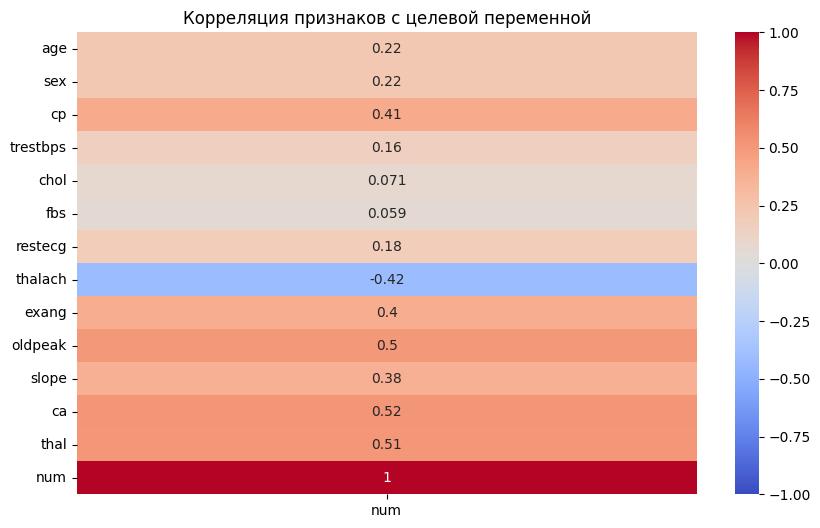

In [73]:
#Вычисление корреляционной матрицы
corr_matrix = data.corr()

#Визуализация корреляции между признаками и целевой переменной (target)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['num']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляция признаков с целевой переменной")
plt.show()

In [74]:
features = ['ca', 'thal', 'oldpeak', 'cp', 'exang', 'slope', 'age', 'sex', 'restecg', 'trestbps', 'thalach']
X = data[features]
y = data['num']

3. Обучение модели

In [75]:
#Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
#Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
#Предсказание на тестовой выборке
y_pred = model.predict(X_test)

4. Оценка модели

In [78]:
#Метрики качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 0.70
R²: 0.58


Оценка базовой модели:

In [79]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Обучение dummy-модели (предсказывает среднее значение)
dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(X_train, y_train)

#Предсказания dummy-модели
y_dummy_pred = dummy_reg.predict(X_test)

In [80]:
#Метрики dummy-модели
print("Метрики дамми модели (линейная регрессия):")
print(f"MSE: {mean_squared_error(y_test, y_dummy_pred):.2f}")
print(f"R^2: {r2_score(y_test, y_dummy_pred):.2f}")

Метрики дамми модели (линейная регрессия):
MSE: 1.70
R^2: -0.02


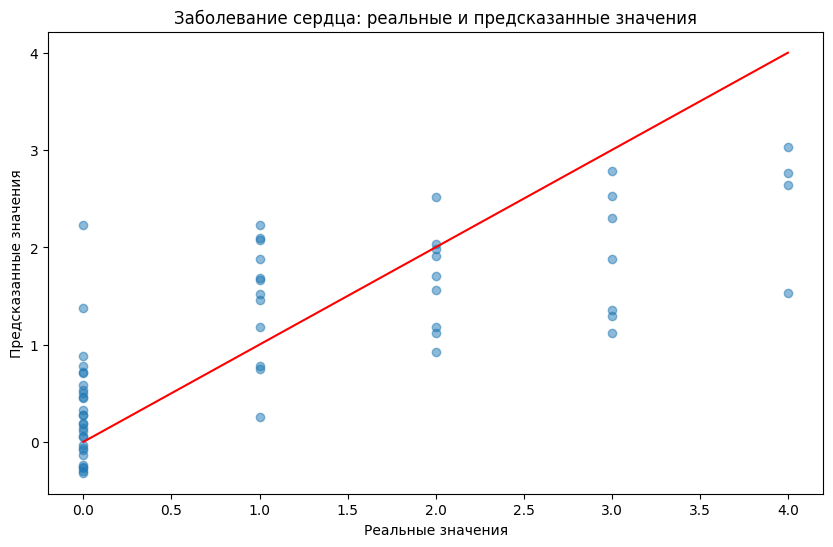

In [81]:
#График реальных и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Заболевание сердца: реальные и предсказанные значения")
plt.plot([0, 4], [0, 4], color='red')  #Идеальная линия
plt.show()

5. Интерпретация коэффицентов

In [82]:
#Таблица коэффициентов
coefficients = pd.DataFrame({
    'Признак': features,
    'Коэффициент': model.coef_
})
print("Влияние признаков на вероятность заболевания:")
print(coefficients)

Влияние признаков на вероятность заболевания:
     Признак  Коэффициент
0         ca     0.430063
1       thal     0.116648
2    oldpeak     0.194307
3         cp     0.217785
4      exang     0.272028
5      slope     0.156626
6        age    -0.005262
7        sex     0.204669
8    restecg     0.089119
9   trestbps     0.005302
10   thalach    -0.003754


6. Предсказание для произвольных данных

In [83]:
#Возьмем произвольные значения для признаков
new_data = pd.DataFrame({
    'age': [63], #Возраст
    'sex': [1], #Пол (1 - мужской, 0 - женский)
    'cp': [3], #Тип боли (3 - острый)
    'trestbps': [145], #Систолическое давление
    'restecg': [0], #ЭКГ в покое (0 - нормальный)
    'thalach': [150], #Макс. пульс
    'exang': [0], #Стенокардия (0 - нет)
    'oldpeak': [2.3], #Снижение ST-сегмента
    'slope': [3], #Складка на пике (3 - крутой)
    'ca': [0], #Количество крупных сосудов
    'thal': [1] #Талассемия (1 - нормальная)
}, columns=X.columns)

In [84]:
prediction = model.predict(new_data)
print(f"Предсказанная вероятность заболевания: {prediction[0]:.2f}")

Предсказанная вероятность заболевания: 0.55


7. Выводы:
- Важнейшими признаками, влияющими на вероятность заболевания, являются возраст, тип боли в груди, максимальный пульс, холестерин и показатели ЭКГ.
- Линейная регрессия значительно превосходит dummy-модель в обеих метриках: MSE и R². Это подтверждает, что линейная регрессия эффективно работает для данной задачи, извлекая зависимость между признаками и целевой переменной.
- Пример предсказания для новых данных показал вероятность заболевания.